<img align="left" style="width: 170px;" src="udea_escudo.png">

# Laboratorio 7 PDS 2020-1
### Yorguin José Mantilla Ramos
CC.1127617499
 
Grupo:3


### 1. Transformada Rapida de Fourier para señales discretas

In [1]:
import numpy as np
import my_utils as mu
import matplotlib.pyplot as plt

def dftmatrix(N, Nfft):
    #construct DFT matrix
    k= np.arange(Nfft)
    if N is None: N = Nfft
    n = np.arange(N)
    U = np.matrix(np.exp(1j * 2 * np.pi/Nfft * k * n[:,None]))
    return U/np.sqrt(Nfft)

#X=U.H * x # donde U.H significa el complejo conjugado de la matriz U

#### 1.1 Genere la señal de acuerdo al último número de su cédula (C):

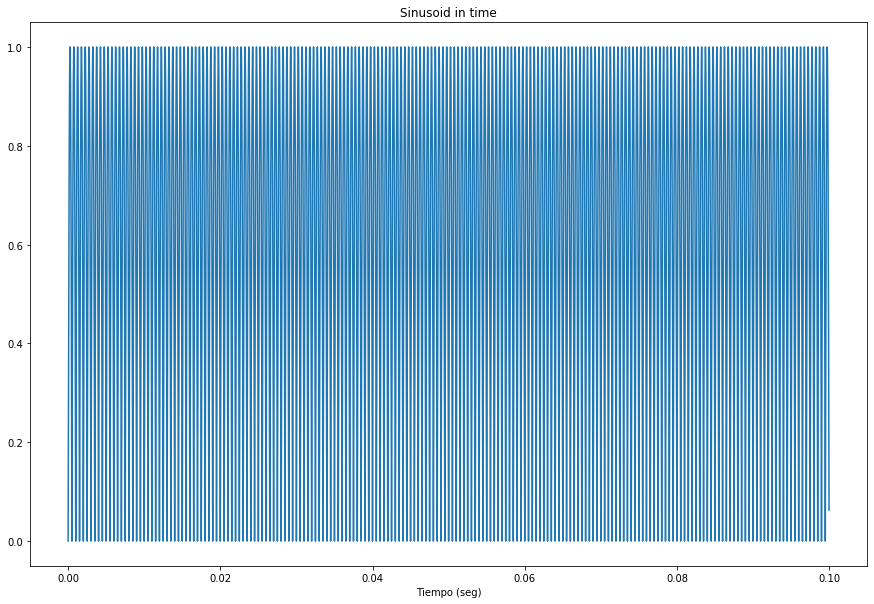

In [2]:
# Signal in time
def get_xt():
    C = 9
    fs = 10000*(C+1)
    f0 = 100*(C+1)
    t = np.arange(0, 0.1, 1/fs) # vector de tiempo
    xt=np.abs(np.sin(2 * np.pi * f0 * t)) # senal en el tiempo
    return t,xt,fs

t,xt,fs = get_xt()

plt.subplot(111)
plt.plot(t, xt)
plt.xlabel('Tiempo (seg)')
plt.title('Sinusoid in time')
plt.gcf().set_size_inches(15,10)
plt.show()


def get_fft(xt,nfft,fs):
    xt.shape=(len(xt),1) # Convierto en vector columna para poder multiplicar con la matriz
    U=dftmatrix(len(xt), nfft) # calculo la matriz de transformacion
    Xf=U.H * xt[:] # calculo la fft
    freq=np.hstack((np.arange(0, nfft/2-1), np.arange(-nfft/2 , 1))) * fs/nfft # vector de frecuencias ...
    #Xf = Xf
    print(Xf.shape)
    #Xf = fft(xt,n=nfft)
    return freq,Xf



#### 1.2 Calcule la matriz de transformación U, y calcule y grafique la transformada de Fourier de la se˜ nal asignada para almenos 4 distintos valores de NFFT. Grafique los resultados usando subplots. ¿Que se puede concluir al respecto?

(128, 1)
(512, 1)
(1024, 1)
(2048, 1)
(10000, 1)
(16384, 1)


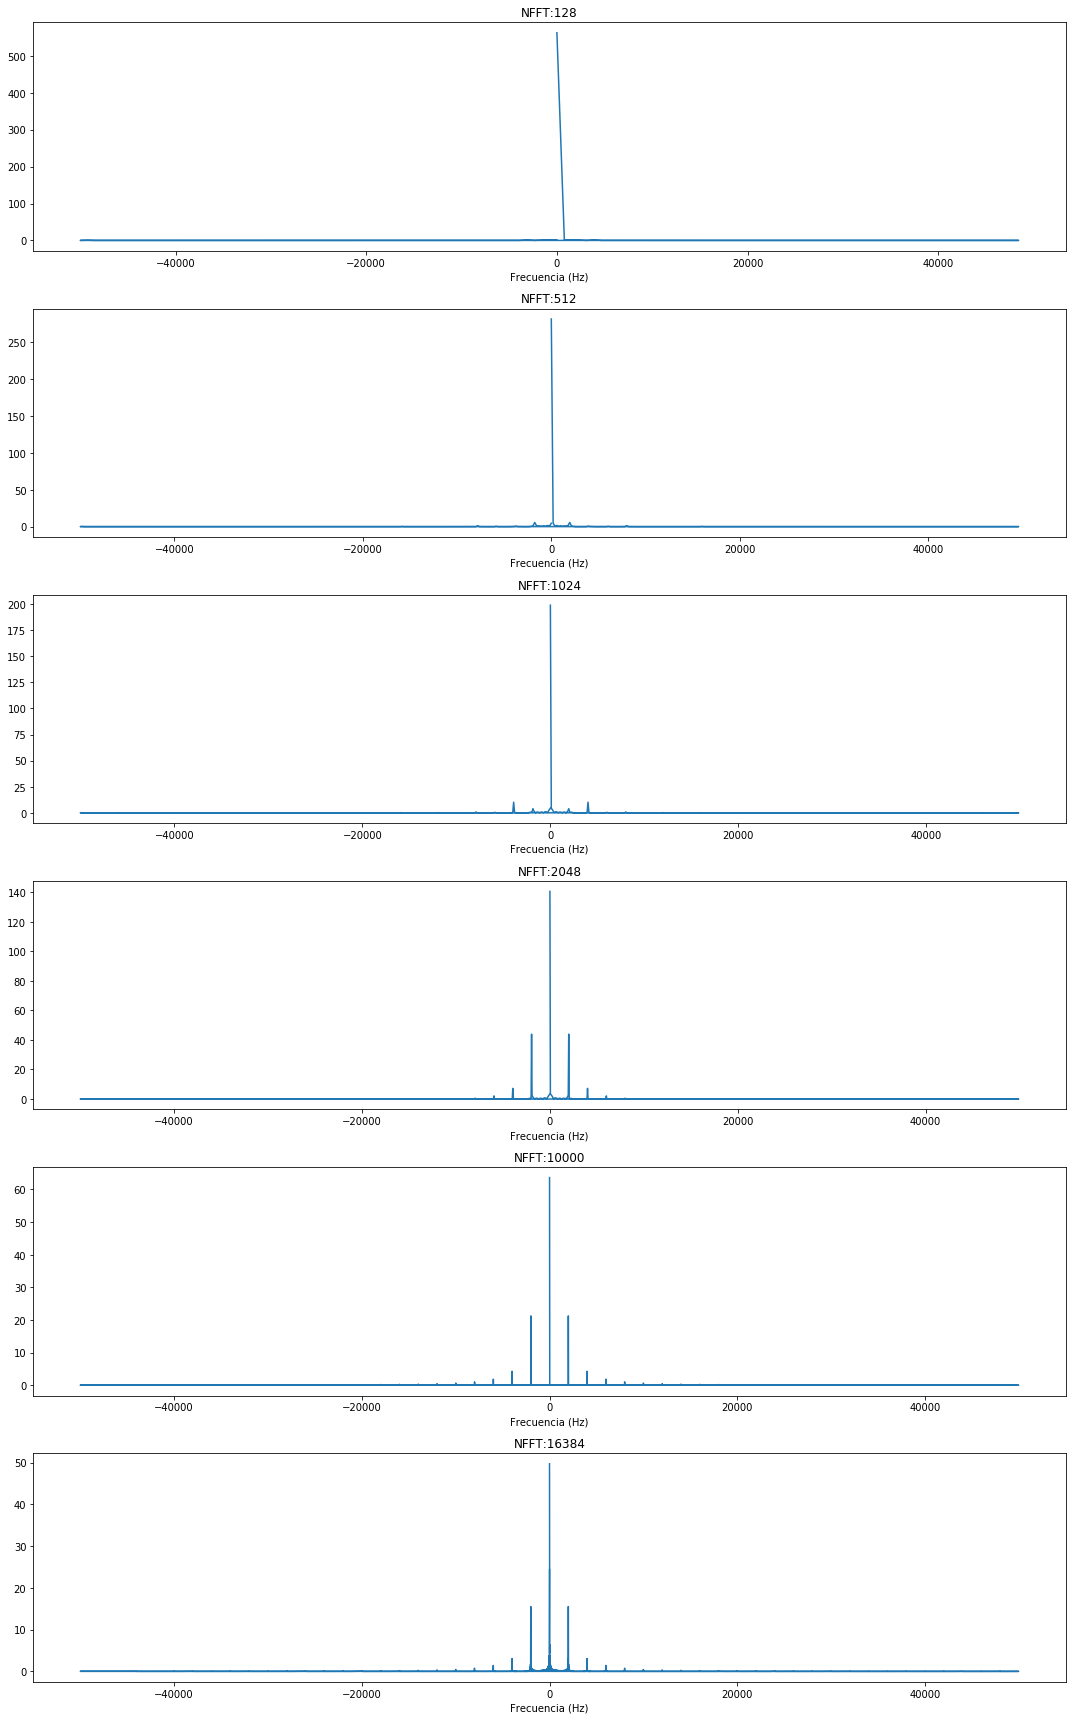

In [17]:

t,xt,fs = get_xt()
fig, ax = plt.subplots(6)
fig.set_size_inches(15,6*4)
# Signal in frequency
for i,nfft in enumerate([128,512,1024,2048,xt.shape[0],16384]):
    #xt.shape=(len(xt),1) # Convierto en vector columna para poder multiplicar con la matriz
    #U=dftmatrix(len(xt), nfft) # calculo la matriz de transformacion
    #Xf=U.H * xt[:] # calculo la fft
    #freq=np.hstack((np.arange(0, nfft/2-1), np.arange(-nfft/2, 1))) * fs/nfft # vector de frecuencias ...
    #para poder graficar la fft en Hz
    freq,Xf = get_fft(xt,nfft,fs)
    # genero graficas
    
    ax[i].plot(freq, np.abs(Xf))
    ax[i].set_title('NFFT:'+str(nfft))
    ax[i].set_xlabel('Frecuencia (Hz)') 



plt.tight_layout()
plt.show()


Conclusion:

- Mientras mayor sea el numero de puntos usados para la fft, mejor será la representación frecuencial.
- Una vez se usa el mismo número de puntos que la señal, agregar puntos no mejora la representacion frecuencial

#### 1.3 Use la siguiente instrucción para calcular la transformada inversa en cada uno de los casos del item anterior. Grafique los resultados usando subplots y comparelos. ¿Puede observar alguna diferencia?, ¿a que se debe esto? Escriba sus conclusiones.

(128, 1)
(512, 1)
(1024, 1)
(2048, 1)
(10000, 1)
(16384, 1)


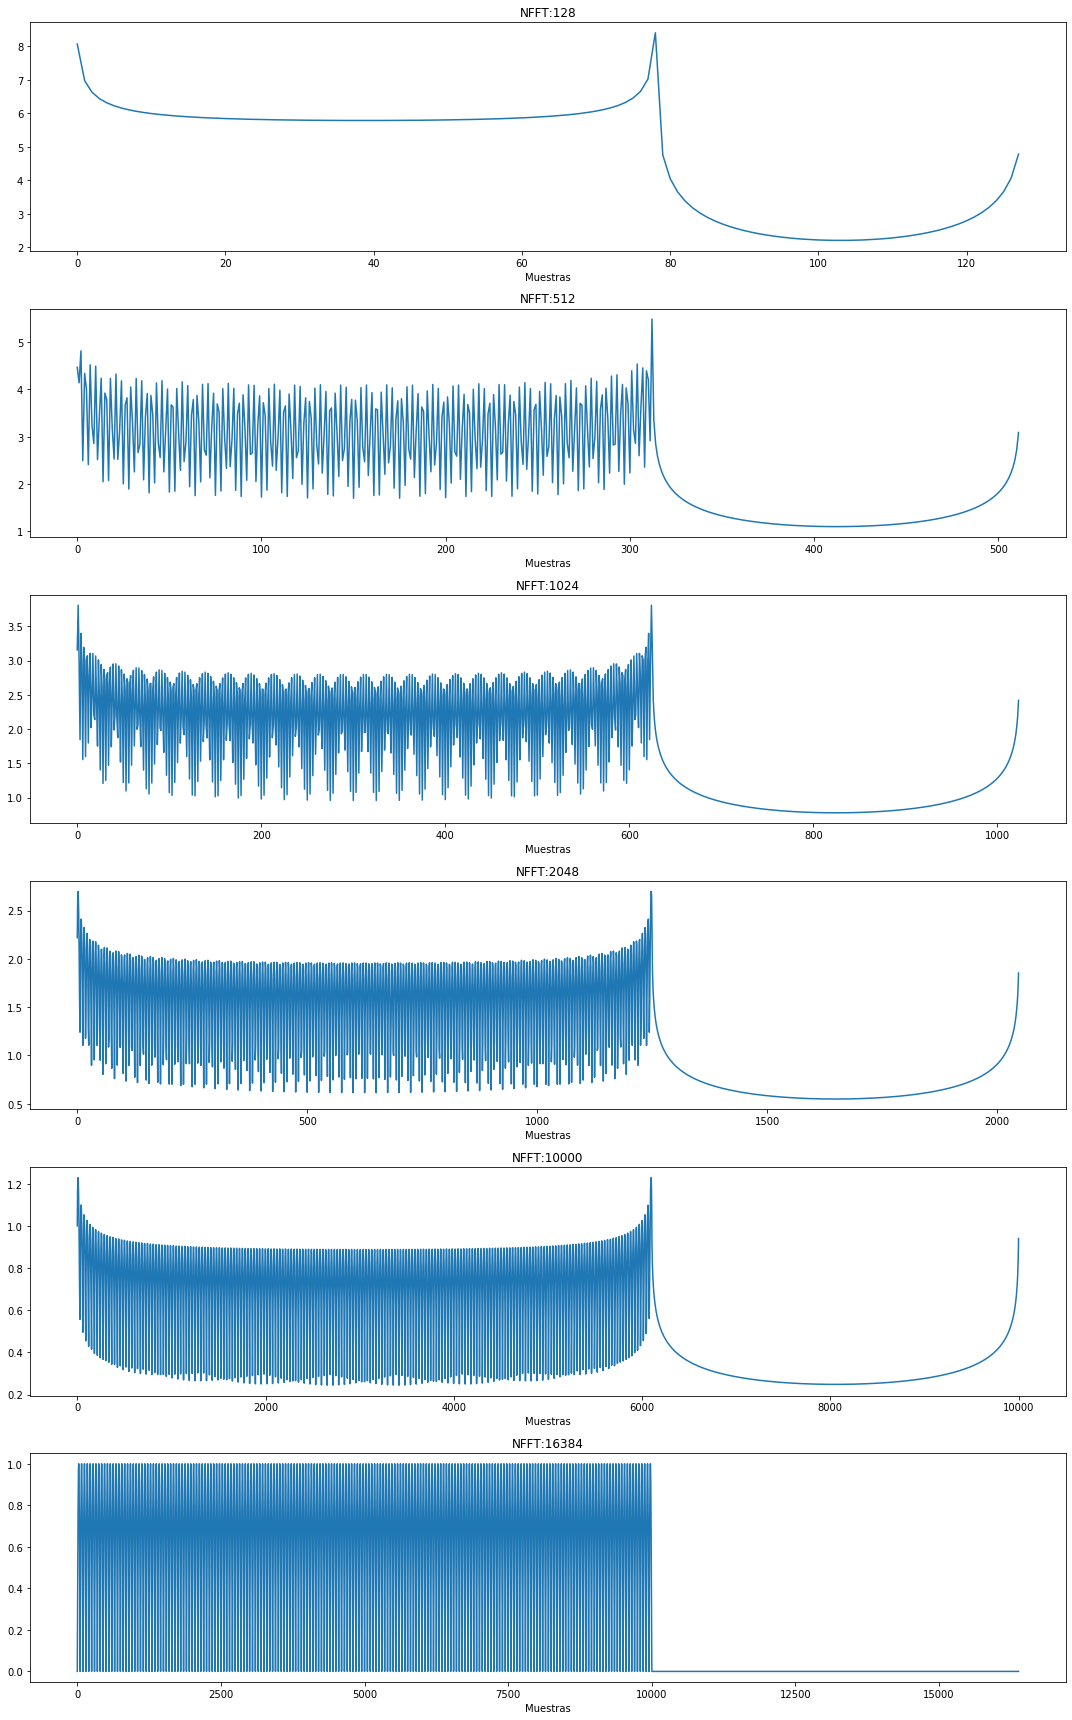

In [18]:
from scipy.fftpack import fft, ifft

fig, ax = plt.subplots(6)
fig.set_size_inches(15,6*4)
# Signal in frequency

t,xt,fs = get_xt()

for i,nfft in enumerate([128,512,1024,2048,xt.shape[0],16384]):

    freq,xf = get_fft(xt,nfft,fs)
    inversa= np.abs(np.fft.ifft(Xf,axis=0,norm='ortho',n=nfft))
    ax[i].plot(np.abs(inversa))
    ax[i].set_title('NFFT:'+str(nfft))
    ax[i].set_xlabel('Muestras') 



plt.tight_layout()
plt.show()







Conclusion
- Solo cuando el número de puntos de la NFFT es mayor a la longitud de la señal esta se puede recuperar
- Utilizar un número de puntos correspondiente a una potencia de dos optimiza el algoritmo.
- En este caso se uso la normalización mediante 1/sqrt(n) por lo que se uso la normalizacion 'orto' para la ifft. De esta manera se recupera bien la amplitud.
- En particular la mejor forma de recuperar la señal es utilizar la potencia de dos igual o proxima a la longitud de la señal, luego. El resultado tendrá ceros concatenados a la derecha (zero_padding) una vez se haya completado la longitud original de la señal. La siguiente celda muestra esto:

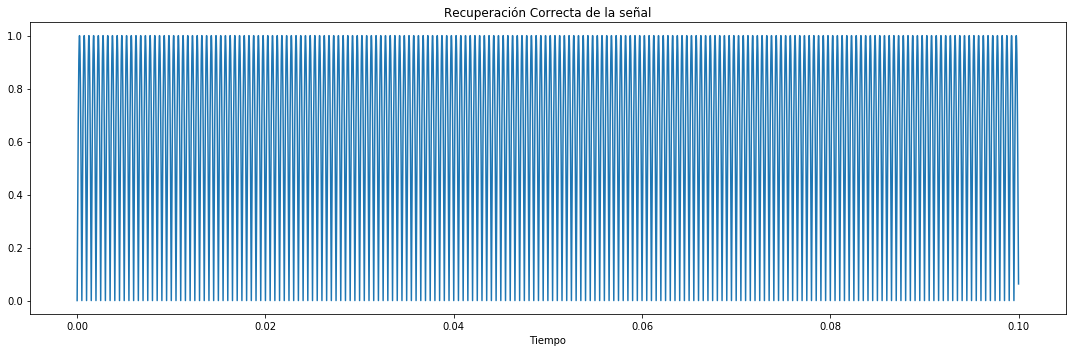

In [5]:
plt.plot(t,np.abs(inversa)[:xt.shape[0]])
plt.gcf().set_size_inches(15,5)
plt.title('Recuperación Correcta de la señal')
plt.xlabel('Tiempo')
plt.tight_layout()
plt.show()


### 2. Modulación PSK

#### 2.1 Codifique los dos últimos d´ıgitos de su c´ edula en binario (4 bits por d´ıgito), y arme una trama de bits para ser transmitida.

In [6]:

digits = [9,9]

binary = [bin(x) for x in digits]

print(binary)

['0b1001', '0b1001']


#### 2.2 Usando E b =1, T b =0.002, f c =1000Hz, fs=7000Hz genere las se˜ nales s 0 y s 1 para la transmisión de la trama de bits.

[0.         0.00014286 0.00028571 0.00042857 0.00057143 0.00071429
 0.00085714 0.001      0.00114286 0.00128571 0.00142857 0.00157143
 0.00171429 0.00185714]


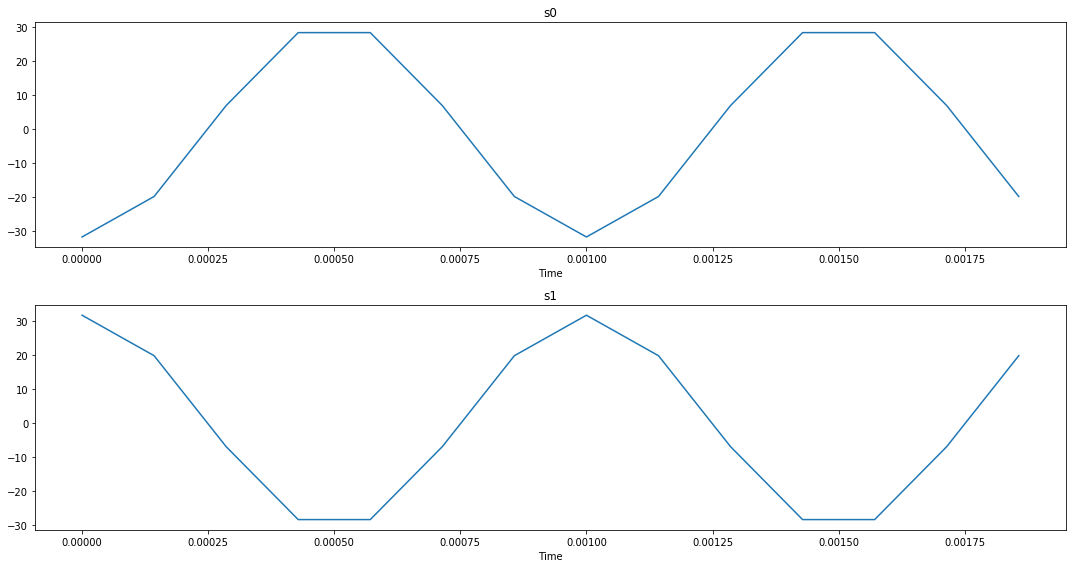

In [7]:
Eb = 1.0
Tb = 0.002
Fc = 1000
Fs = 7000

t  = np.arange(0, Tb, 1.0/Fs)   
print(t)
s0 = (-1)*np.sqrt((2*Eb)/Tb)*np.cos(2*np.pi*Fc*t)  #para el bit 0       
s1 =  (1)*np.sqrt((2*Eb)/Tb)*np.cos(2*np.pi*Fc*t)  #para el bit 1          

names=['s0','s1']

fig, ax = plt.subplots(2,1)
fig.set_size_inches(15,2*4)

for i,sx in enumerate([s0,s1]):
    ax[i].plot(t, sx)
    ax[i].set_title(names[i])
    ax[i].set_xlabel('Time') 



plt.tight_layout()
plt.show()


#### 2.3 Calcule y grafique la FFT de amplitud y fase de las se˜ nales s 0 y s 1 . Cual es la diferencia entre ambas?

(16, 1)
(16, 1)


C:\software\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  app.launch_new_instance()
C:\software\anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
C:\software\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a ste

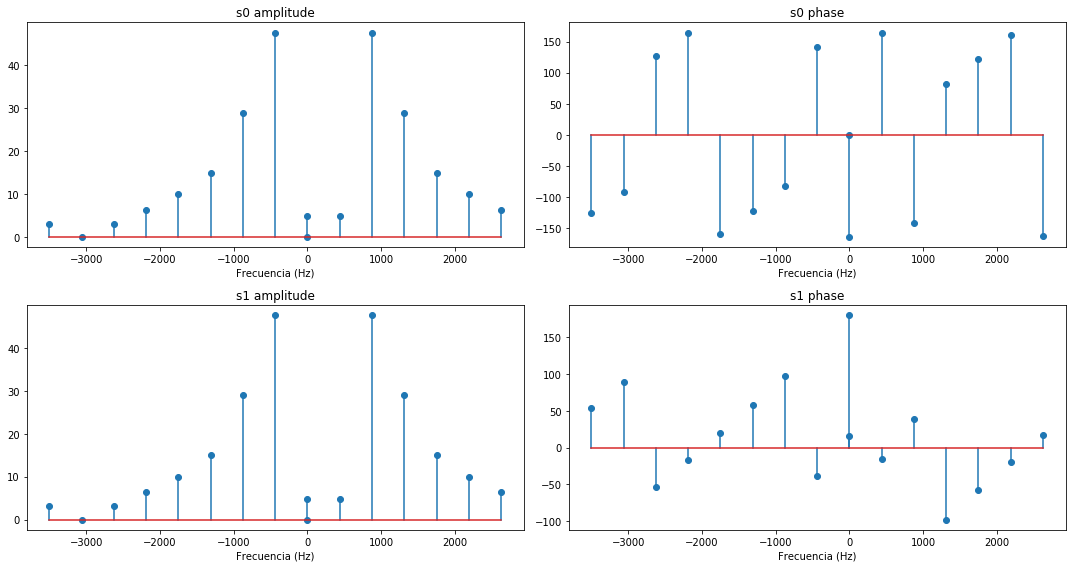

In [8]:
from scipy.fftpack import fft, fftfreq

fig, ax = plt.subplots(2,2)
fig.set_size_inches(15,2*4)

names=['s0','s1']
def next_power_of_2(x):  
    return 1 if x == 0 else 2**(x - 1).bit_length()

t  = np.arange(0, Tb, 1.0/Fs)   
nfft = next_power_of_2(t.shape[0])

for i,sx in enumerate([s0,s1]):
    freq,Xf = get_fft(sx,nfft,Fs)
    phase = np.angle(Xf,deg=True)
    ax[i,0].stem(freq, np.abs(Xf))
    ax[i,0].set_title(names[i] + ' amplitude')
    ax[i,0].set_xlabel('Frecuencia (Hz)') 
    ax[i,1].stem(freq, phase)
    ax[i,1].set_title(names[i] + ' phase')
    ax[i,1].set_xlabel('Frecuencia (Hz)') 



plt.tight_layout()
plt.show()



Conclusiones:
- Ambas tienen el mismo espectro de amplitud pero fase contrario, como es de esperarse en la formula análitica.
- La fase se puede observar al comparar término a término de los espectros en fase. 

#### 2.4 Concatene las se˜ nales s 0 y s 1 de acuerdo con la trama a enviar, por ejemplo: si la trama a enviar es ’0010’, la se˜ nal a enviar es [s 0 , s 0 , s 1 , s 0 ].

In [9]:
secuencia=[s1,s0,s0,s1,s1,s0,s0,s1]
msg=np.array([])
t_all = t.copy()

msg=np.concatenate(secuencia)

for i,seq in enumerate(secuencia):
    if i == 0:
        pass
    else:
        t_all = np.concatenate([t_all,t.copy()+Tb*i])
print(msg.shape)
print(t_all.shape)


(112, 1)
(112,)


#### 2.5 Grafique la se˜ nal obtenida en el tiempo. ¿Se puede distinguir cada uno de los bits?

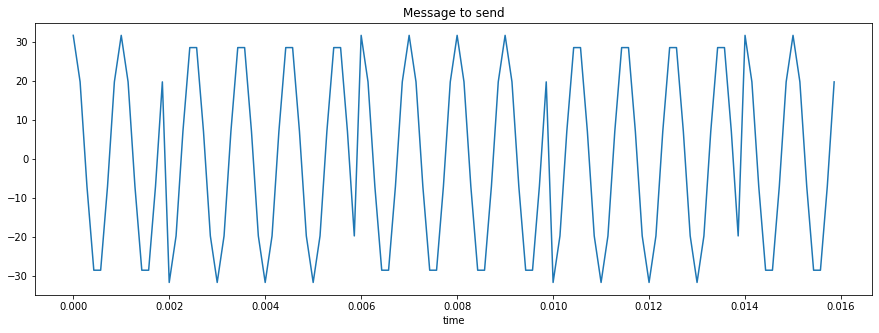

In [10]:
plt.plot(t_all,msg)
plt.xlabel('time')
plt.title('Message to send')
plt.gcf().set_size_inches(15,5)
plt.show()

Conclusiones
- Es posible distinguir los bits pero no tan facílmente

#### 2.6 Calcule y grafique la FFT de magnitud y fase de la se˜ nal concatenada. ¿Qu´ e se puede apreciar?

(128, 1)


C:\software\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
C:\software\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


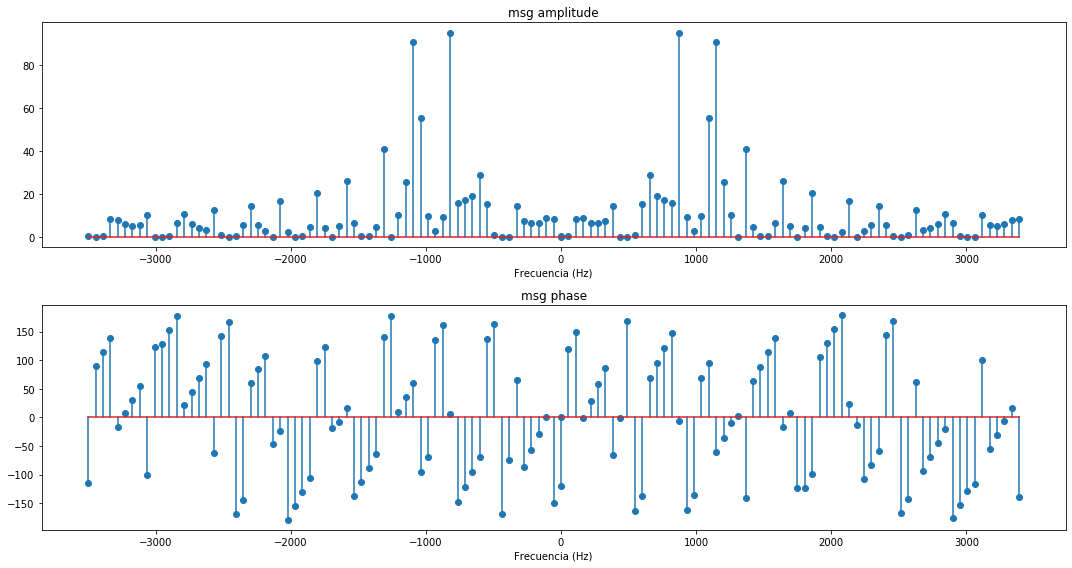

In [11]:
fig, ax = plt.subplots(2,1)
fig.set_size_inches(15,2*4)

nfft = next_power_of_2(t_all.shape[0])

freq,Xf = get_fft(msg,nfft,Fs)
phase = np.angle(Xf,deg=True)
ax[0].stem(freq, np.abs(Xf[:,0]))
ax[0].set_title('msg' + ' amplitude')
ax[0].set_xlabel('Frecuencia (Hz)') 
ax[1].stem(freq, phase)
ax[1].set_title('msg' + ' phase')
ax[1].set_xlabel('Frecuencia (Hz)') 



plt.tight_layout()
plt.show()



Conclusiones:
- El espectro es más díficil de analizar que en el caso no concatenado.
- Sin embargo se puede apreciar que las componentes principales (de mayor energía) 

#### Conclusiones

- La fft es una forma optimizada para calcular la dft, donde el número de puntos a tomar debe ser preferiblemente la potencia de dos mayor o igual al número de puntos de la señal
- Mediante la fft podemos identificar información en una señal a través de la lectura de su fase